# Notebook 5: RAD genomic coverage plot


In [9]:
# conda install toytree -c eaton-lab

In [1]:
import pandas as pd
import numpy as np
import toyplot
import h5py

### Draw chromosomes and RAD markers on chroms

In [10]:
# load data from the database
database = "../analysis-ipyrad/rtest_outfiles/rtest.seqs.hdf5"
with h5py.File(database) as io5:
    phymap = io5["phymap"][:]
    slens = io5["scaffold_lengths"][:]
    snames = io5["scaffold_names"][:]

In [11]:
## what is the average spacing between rad tags?
for chrom in range(1, 13):
    chromdat = phymap[phymap[:, 0] == chrom]
    avglen = np.mean(chromdat[:, 4] - chromdat[:, 3])
    avgspace = np.mean(chromdat[1:, 3] - chromdat[:-1, 4])
    print(chrom, avglen, avgspace)

1 147.81602530311017 14358.737938307408
2 148.81740863787374 15216.1331738437
3 142.03071859572134 15617.092729766804
4 136.94517066085695 16158.91064293498
5 140.3748027946811 15763.351668169522
6 148.90970760233918 13249.12400561535
7 145.70427163198246 13997.447548616818
8 145.64954746369185 14867.378315789474
9 141.9889455782313 14085.107740289197
10 142.81377009402487 15134.184162621359
11 140.7778446718844 15554.664859981933
12 151.99675324675326 14218.683146878384


In [13]:

def draw_chromosomes(faidict):
    
    # get from dict
    faidict = {i: j/1e6 for i,j in faidict.items()}
    snames = sorted(faidict.keys())
    nbars = len(snames)
    
    # get coordinates
    x0 = np.arange(nbars)
    x1 = np.arange(nbars)
    y0 = np.zeros(nbars)
    y1 = np.array([faidict[i] for i in snames])
    vcoords = np.array([
        ([i, j], [k, l]) for (i, j, k, l) in zip(x0, y0, x1, y1)
    ])
    vcoords = np.concatenate(vcoords)
    
    # get edges
    edges = np.column_stack([
        np.arange(0, nbars * 2, 2),
        np.arange(1, nbars * 2 + 1, 2),
    ])

    # plot
    canvas = toyplot.Canvas(width=800, height=300)
    axes = canvas.cartesian(
        ylabel="chromosome",
        xlabel="genomic position (Mb)")
    axes.graph(
        edges, 
        vcoordinates=vcoords,
        vlabel=False,
        vsize=0,
        estyle={"stroke-width": 2, "stroke": toyplot.color.near_black},
        along='y',
    )
    axes.x.ticks.show = True
#     axes.y.ticks.locator = toyplot.locator.Explicit(
#         range(0, max(faidict.values()), int(1e6)),
#         range(0, int(max(faidict.values()) / int(1e6))),
#     )
    axes.y.ticks.labels.angle = -90
    axes.y.ticks.locator = toyplot.locator.Explicit(
        range(len(snames)), range(1, len(snames) + 1)
    )
    return canvas, axes


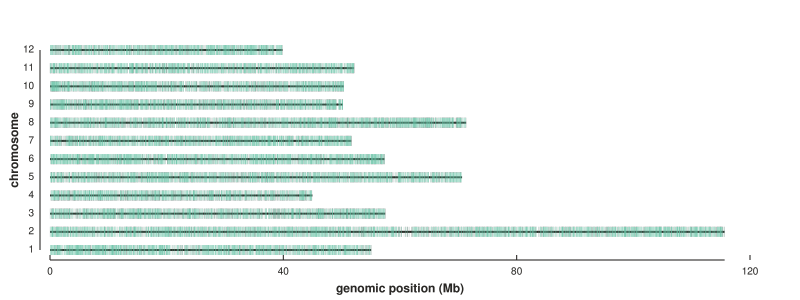

In [14]:
toyplot.config.autoformat = "png"

c, a = draw_chromosomes(faidict);

for chrom in range(1, 13):
    c1 = phymap[phymap[:, 0] == chrom, 4]

    a.scatterplot(
        c1 / 1e6,
        np.repeat(chrom - 1, c1.size), 
        marker="|",
        mstyle={
            "stroke": toyplot.color.Palette()[0],
            "stroke-width": 0.05, 
            "stroke-opacity": 0.5,
        },
        size=10,
    );

In [16]:
import toyplot.pdf
toyplot.pdf.render(c, "../figures/chromosome-RAD-coverage.pdf")